# Hamiltonian Generator

Mizore provides versatile tools in `HamiltonianGenerator` for generating and modifying problem Hamiltonians.

## Molecular Hamiltonians

Mizore produce methods to produce `EnergyObjective` which contains not only the problem Hamiltonian, but also essential information for carrying out VQE on it, such as the Hartree-Fock initialization and energy of chemical accuracy. 

For a simple run or standard tests, the users can use the default molecule Hamiltonians provided by the following functions.

In [1]:
from HamiltonianGenerator import make_example_H2

# Make a default H2 molecular Hamiltonian with sto-3g, and bravyi-kitaev transformation at the equilibrium
energy_obj=make_example_H2()

print("Number of Qubits:",energy_obj.n_qubit)
print("Hartree-Fock init:",energy_obj.init_block)
print("More information:",energy_obj.obj_info)
print("----The Hamiltonian----")
print(energy_obj.hamiltonian)


For default molecules, we have used symmetry to reduce the qubit number needed

In [2]:
from HamiltonianGenerator import make_example_LiH,make_example_H2O,make_example_N2

# Default: basis:sto-3g active space:2 electron/3 orbital(irrep:A1:3)
energy_obj=make_example_LiH()
print("Number of Qubits:",energy_obj.n_qubit)
# Default: basis:sto-3g active space:4 electron/5 orbital(irrep:B2:2,A1:3)
energy_obj=make_example_H2O()
print("Number of Qubits:",energy_obj.n_qubit)
# Default: basis:cc-pvdz active space:10 electron/8 orbital(irrep:A1:3)
energy_obj=make_example_N2()
print("Number of Qubits:",energy_obj.n_qubit)

## Graph problem Hamiltonian

Mizore can also run block based qaoa algorithm to solve graph problems, like maxcut and tsp. 

For example, the users can asign a node number(should be even for regular graph) to randomly generate a graph to see examples of solving maxcut and tsp problems

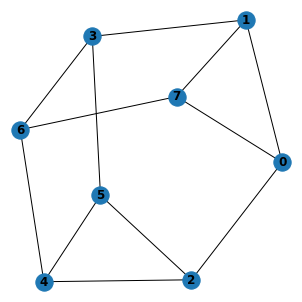

Number of Qubits: 8
More information: {'n_qubit': 8}
----The Hamiltonian----
1.0 [Z0 Z1] +
1.0 [Z0 Z2] +
1.0 [Z0 Z7] +
1.0 [Z1 Z3] +
1.0 [Z1 Z7] +
1.0 [Z2 Z4] +
1.0 [Z2 Z5] +
1.0 [Z3 Z5] +
1.0 [Z3 Z6] +
1.0 [Z4 Z5] +
1.0 [Z4 Z6] +
1.0 [Z6 Z7]


In [2]:
from HamiltonianGenerator import make_example_maxcut, make_example_tsp 

energy_obj = make_example_maxcut(8)
print("Number of Qubits:",energy_obj.n_qubit)
print("More information:",energy_obj.obj_info)
print("----The Hamiltonian----")
print(energy_obj.hamiltonian)

More generally, the users can input a graph to get its maxcut or tsp hamiltonian

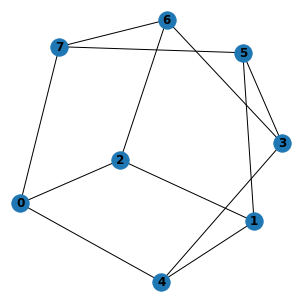

1.0 [Z0 Z2] +
1.0 [Z0 Z4] +
1.0 [Z0 Z7] +
1.0 [Z1 Z2] +
1.0 [Z1 Z4] +
1.0 [Z1 Z5] +
1.0 [Z2 Z6] +
1.0 [Z3 Z4] +
1.0 [Z3 Z5] +
1.0 [Z3 Z6] +
1.0 [Z5 Z7] +
1.0 [Z6 Z7]


In [4]:
from HamiltonianGenerator.QAOA._QAOA_from_graph import random_graph, get_maxcut_hamiltonian_from_graph

graph = random_graph(d=3, n=8)

hamiltonian =  get_maxcut_hamiltonian_from_graph(graph)
print(hamiltonian)


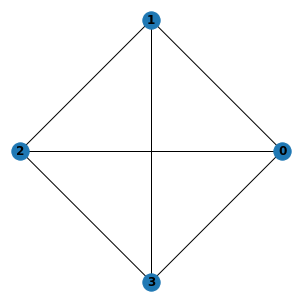

-3.0 [Z0] +
1.0 [Z0 Z5] +
1.0 [Z0 Z9] +
1.0 [Z0 Z13] +
-3.0 [Z1] +
1.0 [Z1 Z6] +
1.0 [Z1 Z10] +
1.0 [Z1 Z14] +
-3.0 [Z2] +
1.0 [Z2 Z7] +
1.0 [Z2 Z11] +
1.0 [Z2 Z15] +
-3.0 [Z3] +
1.0 [Z3 Z8] +
1.0 [Z3 Z12] +
1.0 [Z3 Z16] +
-2.0 [Z4] +
1.0 [Z4 Z9] +
1.0 [Z4 Z13] +
-3.0 [Z5] +
1.0 [Z5 Z10] +
1.0 [Z5 Z14] +
-3.0 [Z6] +
1.0 [Z6 Z11] +
1.0 [Z6 Z15] +
-3.0 [Z7] +
1.0 [Z7 Z12] +
1.0 [Z7 Z16] +
-2.0 [Z8] +
1.0 [Z8 Z13] +
-3.0 [Z9] +
1.0 [Z9 Z14] +
-3.0 [Z10] +
1.0 [Z10 Z15] +
-3.0 [Z11] +
1.0 [Z11 Z16] +
-2.0 [Z12] +
-3.0 [Z13] +
-3.0 [Z14] +
-3.0 [Z15] +
-3.0 [Z16]


In [1]:
from HamiltonianGenerator.QAOA._QAOA_from_graph import random_graph, get_tsp_hamiltonian_from_graph

graph = random_graph(d=3, n=4)

hamiltonian =  get_tsp_hamiltonian_from_graph(graph)
print(hamiltonian)

## Stationary qubit reducer
Mizore also provides methods to divide or reduce a Hamiltonian.

In practice, an important function is `get_reduced_energy_obj_with_HF_init`, which can reduce a `EnergyObjective` by `location2reduce` and prepare the qubits to a initial HF  state. `location2reduce` is usually set to be the stationary qubits or inactive qubits.
 
For example, to reduce first two qubits in H2O Hamiltonian:


In [4]:
from HamiltonianGenerator import get_reduced_energy_obj_with_HF_init,make_example_H2O

energy_obj=make_example_H2O()
print("Number of Qubits:",energy_obj.n_qubit)
reduced_obj=get_reduced_energy_obj_with_HF_init(energy_obj,[0,1])
print("Number of Qubits:",reduced_obj.n_qubit)

Symmetry: C2v  is used when build the molecule.
Number of Qubits: 10
Number of Qubits: 8


The spin of a molecular system is conserved and the spin number operator $N^{\uparrow}$ and $N^{\downarrow}$ commute with the Hamiltonian. This symmetry can be used to reduce two qubits in a system. To achieve this, first one need to order the spin-orbitals so that all the spin-up orbitals are in one side and the spin-down orbitals are in the other side (which we call *spin separating*). Then, one need to apply the parity transformation and there will be two stationary qubits. One is the middle qubit and one in the last qubit. All the operations can be easily done by Mizore as follows.

In [ ]:
from HamiltonianGenerator._stationary_qubit_reducer import get_reduced_energy_obj_with_HF_init
from HamiltonianGenerator.FermionTransform import make_transform_spin_separating, get_parity_transform, bravyi_kitaev
from HamiltonianGenerator import make_example_H2O
transform = make_transform_spin_separating(get_parity_transform(10),10)
energy_obj = make_example_H2O(basis="6-31g",fermi_qubit_transform=transform,is_computed=False)
print("Number of qubits:",energy_obj.n_qubit)
energy_obj=get_reduced_energy_obj_with_HF_init(energy_obj,[4,9])
print("Number of qubits (After reduction):",energy_obj.n_qubit)

We can use the classical pre-calculation module in Mizore to verify the vadility of the reduction. (See [CorrelationNetwork](CorrelationNetwork.ipynb) for more about pre-calculation)

In [ ]:
from Precalculation.iTensorCore import run_classcal_precalculation
energy_obj = make_example_H2O(basis="6-31g",fermi_qubit_transform=transform,is_computed=False)
classical_res=run_classcal_precalculation(energy_obj.n_qubit,energy_obj.hamiltonian,calc_2DM=True)
print("Energy:",classical_res["energy"])
print("Entropy:",classical_res["entropy"]) # The entropy of the 4th and 9th qubit should be zero

In [ ]:
energy_obj=get_reduced_energy_obj_with_HF_init(energy_obj,[4,9])
classical_res=run_classcal_precalculation(energy_obj.n_qubit,energy_obj.hamiltonian,calc_2DM=True)
print("Energy:",classical_res["energy"]) # The energy should remain the same
print("Entropy:",classical_res["entropy"])